## Try: Replicate (much of) a Publication With PalmettoBUG

Paper: https://doi.org/10.1016/j.cmet.2018.11.014 
("A Map of Human Type 1 Diabetes Progression by Imaging Mass Cytometry". Damond N, Engler S, Zanotelli VRT, Schapiro D, Wasserfall CH, Kusmartseva I, Nick HS, Thorel F, Herrera PL, Atkinson MA and Bodenmiller B. Cell Metab. 2019 Mar 5;29(3):755-768.e5.)

Data source:

Download (images, metadata -- likely update all to version 2 before finalizing!): https://data.mendeley.com/datasets/cydmwsfztj/1

Download (masks, panel, 100 images subset): https://data.mendeley.com/datasets/cydmwsfztj/2     (version 2)

Data License: CC-BY 4.0 ( https://creativecommons.org/licenses/by/4.0/ ). Obviously the data was modified by its preparation for analysis & the analysis itself in PalmettoBUG.

The data requires some shaping / renaming and placing into folders to get them ready for analysis by PalmettoBUG

Notes:

    -- I am currently not working with the entirety of the dataset, only a subset.

    -- The example data's panel / metadata is not set up in a PalmettoBUG-friendly way, so I will need to set that up

    -- I am not familiar with diabetes research, I will copy useful biological information from paper's text and methods here: 
           - Beta-cell markers = INS, PIN, IAPP, PTPRN ('markers' ), and PDX1, NKX6-1 ('transcription factors')

           - cell typing markers (use all mentioned in FlowSOM classification method):
                - islet vs. immune vs. exocrine vs. other --> CD99, SYP, AMY2A, KRT19, CD44, CD45, CDH, CD3, CD4, CD8, CD20, MPO, CD68, SMA

                - islet cell subtypes (alpha, beta, gamma, delta) --> INS, PIN, GCG, SST, PPY, PDX1, NKX6-1, IAPP, PCKS2, CD99, SYP

                - immune cells:
                     effector CD8 T cells: 'Tc' -- CD3, CD8, (CD45RA negative)
                     naive CD8 T cells: 'naive Tc' -- CD3, CD8, CD45RA
                     CD4 T cells: 'Th' -- CD3, CD4
                     B cells -- CD20
                     monocytes and macrophages: 'Mphi' -- CD45, CD68
                     neutrophils: 'Neutr' -- MPO
                     'other': CD45 or CD45RA but not in the categories above

                 - exocrine (acinar, ductal) --> KRT19, AMY2A, CD44, CDH

                 - other (endothelial, stroma, unknown) --> SMA, CD31, CD68, CDH

            - islet / blood vessel segmenation markers: SYP, CD99, CD31, CD45, AMY2A, KRT19, Iridum intercalator
                 

In [1]:
import os
import time
import warnings

import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
start_timer = time.time()

import palmettobug
print(time.time() - start_timer)  ## keep track of time after each major step -- 
                                  ## these numbers will only really matter on the FINAL run once everything is setup and the notebook is run sequentially. 

The PalmettoBUG package is copyrighted 2024-2025 by the Medical University of South Carolina and licensed under the GPL-3 license.
It is free & open source software, can  be redistributed in compliance with the GPL3 license, and comes with absolutely no warranty.
In python, use palmettobug.print_license() to see the license, or use palmettobug.print_3rd_party_license_info() to print information
about the licenses and copyright of 3rd party software used in PalmettoBUG itself or in the creation of PalmettoBUG.
66.40212321281433


In [3]:
palmettobug.__version__

'0.2.11'

In [4]:
directory = "C:/Users/Default/Desktop/data/PBUG"  # where I placed the source images (in directory/raw), and the masks in (directory/masks/Masks),
                                                  # as well as the original panel and metadata

In [5]:
downloaded_panel = pd.read_csv(directory + "/original_panel.csv")
downloaded_panel                   ## notice the duplicate of Yb176 -- I not sure what this means. I will need to be careful to ensure that the 
                                   # channel order is the same and the channel labels are accurate (!!)

,TubeNb,MetalTag,Target,Clone,Stock.Conc,Final.Conc,channel,full,main,ilastik_cells,ilastik_structures,clean_Target,shortname,miCAT2,miCAT
0,1056.0,In113,Histone H3,D1H2,300.0,4.00,1.0,1,1,1,1,H3,H3,Cell_HistoneH3,Cell_Histone_1261919In113In113Di_In113
1,1081.0,In115,SMA,1A4,300.0,1.00,2.0,1,1,1,1,SMA,SMA,Cell_SMA,Cell_SMA_1741944In115In115Di_In115
2,NaN,Xe134,Xenon,NaN,NaN,NaN,NaN,0,0,0,0,Xenon,Xenon,NaN,Cell_134XeXe134Di_Xe134
3,1150.0,Pr141,insulin,C27C9,300.0,5.00,3.0,1,1,0,0,INS,INS,Cell_Ins,Cell_insulin_6772013Pr141Pr141Di_Pr141
4,1105.0,Nd142,CD38,EPR4106,300.0,5.00,4.0,1,1,0,0,CD38,CD38,Cell_CD38,Cell_CD38_17191968Nd142Nd142Di_Nd142
5,1125.0,Nd143,CD44,IM7,200.0,1.50,5.0,1,1,1,0,CD44,CD44,Cell_CD44,Cell_CD44_681988Nd143Nd143Di_Nd143
6,1132.0,Nd144,Prohormone Convertase 2,Polyclonal _ PC2,200.0,5.00,6.0,1,1,0,0,PCSK2,PCSK2,Cell_PC2,Cell_Prohorm_17681995Nd144Nd144Di_Nd144
7,1120.0,Nd145,CD99,HCD99,200.0,0.25,7.0,1,1,1,1,CD99,CD99,Cell_CD99,Cell_CD99_8191983Nd145Nd145Di_Nd145
8,987.0,Nd146,CD68,KP1,300.0,5.00,8.0,1,1,0,0,CD68,CD68,Cell_CD68,Cell_CD68_771781Nd146Nd146Di_Nd146
9,1165.0,Sm147,Myeloperoxidase MPO,Polyclonal MPO,300.0,2.50,9.0,1,1,1,0,MPO,MPO,Cell_MPO,Cell_Myelope_2762028Sm147Sm147Di_Sm147


In [6]:
downloaded_panel = downloaded_panel.loc[np.array(downloaded_panel['full']).astype('bool'),['Target','MetalTag','clean_Target']]

pbug_panel = pd.DataFrame()
pbug_panel['channel'] = list(downloaded_panel['MetalTag'])
pbug_panel['name'] = list(downloaded_panel['clean_Target'])
pbug_panel['keep'] = 1
pbug_panel['segmentation'] = ''    ## I plan to use the masks provided by the paper, not those generated in pbug / iSD by deepcell (or otherwise)
                                   ## so I can ignore this column entirely. Otherwise I'd set channels 0,36,37 to nuclei. I am less certain about the cytoplasmic channel(s)
pbug_panel.to_csv(directory + "/panel.csv", index = False)

pbug_panel

,channel,name,keep,segmentation
0,In113,H3,1,
1,In115,SMA,1,
2,Pr141,INS,1,
3,Nd142,CD38,1,
4,Nd143,CD44,1,
5,Nd144,PCSK2,1,
6,Nd145,CD99,1,
7,Nd146,CD68,1,
8,Sm147,MPO,1,
9,Nd148,SLC2A1,1,


In [7]:
resolutions = [1.0, 1.0]
ImageAnalysis = palmettobug.imc_entrypoint(directory, resolutions = resolutions, from_mcds = False)
print(time.time() - start_timer)  ## keep track of time after each major step

68.62274837493896


In [8]:
# "convert" raw --> .ome.tiffs. Since were starting with tiffs, this is really just hot-pixel filtering
ImageAnalysis.raw_to_img(hpf = 0.85)
print(time.time() - start_timer)  ## keep track of time after each major step

The number of channels in /C01_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /C02_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /C03_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /C04_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /C05_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /C06_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /C07_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /C08_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /C09_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /C10_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /C11_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /C12_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /C13_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /C14_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /C15_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /C16_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /C17_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /C18_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /C19_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /C20_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /C21_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /C22_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /C23_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /C24_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /C25_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /C26_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /C27_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /C28_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /C29_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /C30_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /C31_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /C32_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /C33_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /C34_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /D01_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /D02_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /D03_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /D04_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /D05_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /D06_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /D07_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /D08_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /D09_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /D10_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /D11_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /D12_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /D13_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /D14_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /D15_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /D16_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /D17_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /D18_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /D19_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /D20_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /D21_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /D22_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /D23_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /D24_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /D25_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /D26_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /D27_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /D28_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /D29_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /D30_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /D31_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /D32_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /D33_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /D34_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /D35_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /D36_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /E02_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /E03_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /E04_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /E05_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /E06_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /E07_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /E08_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /E09_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /E10_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /E11_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /E12_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /E13_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /E14_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /E15_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /E16_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /E17_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /E18_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /E19_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /E20_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /E21_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /E22_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /E23_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /E24_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /E25_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /E26_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /E27_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /E28_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /E29_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /E30_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /E31_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /E32_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /E33_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /E34_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /E35_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /E36_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /E37_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /E38_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /E39_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /E40_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /E41_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /E42_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /F01_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /F02_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /F03_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /F04_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /F05_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /F06_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /F07_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /F08_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /F09_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /F10_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /F11_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /F12_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /F13_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /F14_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /F15_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /F16_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /F17_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /F18_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /F19_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /F20_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /F21_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /F22_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /F23_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /F24_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /F25_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /F26_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /J01_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /J02_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /J03_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /J04_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /J05_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /J06_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /J07_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /J08_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /J09_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /J10_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /J11_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /J12_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /J13_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /J14_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /J15_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /J16_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /J17_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /J18_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /J19_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /J20_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /J21_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /J22_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /J23_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /J24_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /J25_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /J26_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /J27_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /J28_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /J29_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /J30_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /J31_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /J32_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /J33_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /J34_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /J35_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /J36_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /K01_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /K02_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /K03_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /K04_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /K05_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /K06_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /K07_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /K08_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /K09_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /K10_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /K11_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /K12_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /K13_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /K14_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /K15_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /K16_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /K17_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /K18_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /K19_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /K20_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /K21_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /K22_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /K23_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /K24_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /K25_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /K26_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /K27_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /K28_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /K29_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /K30_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /K31_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /K32_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /K33_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /K34_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /K35_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /K36_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /L01_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /L02_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /L03_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /L04_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /L05_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /L06_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /L07_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /L08_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /L09_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /L10_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /L11_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /L12_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /L13_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /L14_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /L15_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /L16_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /L17_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /L18_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /L19_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /L20_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /L21_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /L22_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /L23_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /L24_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /L25_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /L26_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /L27_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /L28_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /L29_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /L30_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /L31_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /L32_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /L33_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /L34_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /L35_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /L36_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /M01_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /M02_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /M03_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /M04_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /M05_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /M06_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /M07_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /M08_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /M09_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /M10_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /M11_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /M12_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /M13_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /M14_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /M15_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /M16_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /M17_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /M18_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /M19_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /M20_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /M21_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /M22_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /M23_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /M24_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /M25_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /M26_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /M27_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /M28_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /M29_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /M30_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /M31_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /M32_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /M33_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /M34_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /M35_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /M36_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /N25_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /N26_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /N27_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /N28_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /N29_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /N30_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /N31_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /N32_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /N33_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /N34_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /N35_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /N36_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /N37_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /N38_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /N39_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /N40_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /N41_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /N42_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /N43_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /N44_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /N45_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /N46_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /N47_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /N48_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /N49_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /N50_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /N51_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /N52_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /N53_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /N54_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /N55_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /N56_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /N57_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /N58_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /N59_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /N60_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /O01_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /O02_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /O03_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /O04_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /O05_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /O06_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /O07_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /O08_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /O09_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /O10_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /O11_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /O12_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /O13_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /O14_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /O15_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /O16_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /O17_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /O18_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /O19_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /O20_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /O21_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /O22_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /O23_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /O24_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /O25_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /O26_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /O27_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /O28_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /O29_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /O30_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /O31_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /O32_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /O33_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /O34_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /O35_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /O36_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /V01_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /V02_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /V03_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /V04_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /V05_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /V06_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /V07_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /V08_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /V09_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /V10_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /V11_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /V12_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /V13_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /V14_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /V15_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /V16_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /V17_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /V18_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /V19_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /V20_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /V21_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /V22_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /V23_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /V24_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /V25_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /V26_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /V27_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /V28_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /V29_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /V30_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /V31_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /V32_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /V33_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /V34_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /V35_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /V36_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /W01_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /W02_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /W03_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /W04_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /W05_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /W06_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /W07_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /W08_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /W09_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /W10_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /W11_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /W12_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /W13_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /W14_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /W15_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /W16_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /W17_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /W18_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /W19_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /W20_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /W21_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /W22_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /W23_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /W24_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /W25_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /W26_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /W27_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /W28_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /W29_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /W31_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /W32_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /W33_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /W34_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /W35_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /W36_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /W37_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.


The number of channels in /W38_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
The number of channels in /W39_a0_full.tiff of C:/Users/Default/Desktop/data/PBUG/raw does not match the number of channels 
                          in the panel file! Skipping this ROI.
142.556893825531


## Islet Identification by pixel classifier

First identify islet regions by classifier, then watershed segment into separate islets, then generate masks of only large islets, etc.

In [9]:
## Setup, train, and run a supervised classifier for pancreatic islets. 
## CRTIICAL: the training labels (one .tiff) were already made for this from inside the GUI / Napari, which is included in the folder with this script
    ## So I don't bother showing its annotation here, it is simply automatically loaded. To repeat, take the training_labels files and placed inside the
    ## the training labels folder of the islet classifier, once it has been setup from this script.

sup_classifier_name = "Classifier_1.json"
px_classifier = palmettobug.SupervisedClassifier(homedir = directory)
classes = {1:'background', 2:'islet'}
sigma_list = [1.0,2.0,4.0]
features = ['GAUSSIAN','LAPLACIAN']
channels = {
        "SMA": 1,
        "PCSK2": 5,
        "CD99": 6,
        "AMY2A": 11,
        "PPY": 13,
        "PDX1": 16,
        "KRT19": 19,
        "CD45": 20,
        "CD31": 30,
        "CDH": 31,
        "PTPRN": 32,
        "Ir191": 34
    }
image_directory = directory + "/images/ImageSubset"
model, details = px_classifier.setup_classifier(classifier_name = sup_classifier_name, 
                               number_of_classes = 2, 
                               sigma_list = sigma_list, 
                               features_list = features, 
                               channel_dictionary = channels,
                               classes_dictionary = classes,
                               image_directory = image_directory)

px_classifier.train_folder(image_directory)
px_classifier.predict_folder(image_directory)   ## train / predict / segment only has to be run once -- the generated masks can be used without needing to re-do

In [10]:
## Note! This method of islet segmentation is vulernable to a few errors:
    # 1). Very large islets can be split into multiple (two or more, depending on how large!) masks. This is dependent on centroid <--> centroid distance
        # with lower numbers for this parameter favoring smaller / more fragmented masks
    # 2). islets close (but discontinuous) to another islet can be ignored -- this is dependent on the centroid <--> centroid distance specified, with
        # higher numbers for this parameter more likely to cause islets to be ignored when masking.
## the second problem should be more likely to affect small islets (as their centroids are likely to be closer to their surface), visually this seemed to be the case 
## when testing different centroid distances when segmenting. 
## I visually checked the output of this segmentation (inside the GUI, using the 'quick display' feature of the directory navigator) for many of the ROIs. I could see 
## instances of both problems listed above, which could not be entirely avoided as increasing the centroid <--> centroid distance might solve problem #1, but would 
# make problem #2 worse (And vice versa).
# I tested (not rigorously systematically) different parameters for the centroids (mostly) and size threshold and settled on the values below:

islet_mask_folder = f"{directory}/masks/islet_masks"
palmettobug.segment_class_map_folder(px_classifier.output_directory, output_folder = islet_mask_folder, 
                                     distance_between_centroids = 90, threshold = 350, to_segment_on = [2]) 

## generate masks where only islet with >15 cells are kept
ImageAnalysis.mask_intersection_difference(ImageAnalysis.directory_object.masks_dir + "/islet_masks", ImageAnalysis.directory_object.masks_dir + "/Masks", 
                                     object_threshold = 15, pixel_threshold = 7, output_folder =  ImageAnalysis.directory_object.masks_dir + "/large_islets")

## generate a folder of masks, derived from the cell masks provided rom the paper, where only cell masks inside large islets are kept
ImageAnalysis.mask_intersection_difference(ImageAnalysis.directory_object.masks_dir + "/Masks", ImageAnalysis.directory_object.masks_dir + "/large_islets", 
                                     object_threshold = 1, pixel_threshold = 7, output_folder = ImageAnalysis.directory_object.masks_dir + "/Masks_large_islets")   ## output is default value as well

In [11]:
## do region measurements   -- uncomment once doing the full data set

'''
analysis_folder = "analysis"
ImageAnalysis.directory_object.make_analysis_dirs(analysis_folder)
input_images = ImageAnalysis.directory_object.img_dir + "/img"
input_masks = ImageAnalysis.directory_object.masks_dir + "/Masks"
## masks provided in download do not match the PalmettoBUG / Steinbock convention of having identical names to the source files
for i in os.listdir(input_masks):
    current = f'{input_masks}/{i}'
    os.rename(current, current.replace("_masks",""))
'''

#ImageAnalysis.make_segmentation_measurements(input_images, input_masks, re_do = True)

'\nanalysis_folder = "analysis"\nImageAnalysis.directory_object.make_analysis_dirs(analysis_folder)\ninput_images = ImageAnalysis.directory_object.img_dir + "/img"\ninput_masks = ImageAnalysis.directory_object.masks_dir + "/Masks"\n## masks provided in download do not match the PalmettoBUG / Steinbock convention of having identical names to the source files\nfor i in os.listdir(input_masks):\n    current = f\'{input_masks}/{i}\'\n    os.rename(current, current.replace("_masks",""))\n'

In [12]:
## for 100 image subset -- do segmentation measurements

analysis_folder = "analysis_subset"
ImageAnalysis.directory_object.make_analysis_dirs(analysis_folder)
input_images = ImageAnalysis.directory_object.img_dir + "/ImageSubset"
input_masks = ImageAnalysis.directory_object.masks_dir + "/Masks"
## masks provided in download do not match the PalmettoBUG / Steinbock convention of having identical names to the source files
for i in os.listdir(input_images):
    current = f'{input_images}/{i}'
    os.rename(current, current.replace("_clean",""))

ImageAnalysis.make_segmentation_measurements(input_images, input_masks, re_do = True)   ## after first run can set re_do to False to accelerate speed of calculations
print(time.time() - start_timer)  ## keep track of time after each major step

E02_a0_full intensities csv has been written!
E03_a0_full intensities csv has been written!
E04_a0_full intensities csv has been written!
E05_a0_full intensities csv has been written!
E06_a0_full intensities csv has been written!
E07_a0_full intensities csv has been written!
E08_a0_full intensities csv has been written!
E09_a0_full intensities csv has been written!
E10_a0_full intensities csv has been written!
E11_a0_full intensities csv has been written!
E12_a0_full intensities csv has been written!
E13_a0_full intensities csv has been written!
E14_a0_full intensities csv has been written!
E15_a0_full intensities csv has been written!
E16_a0_full intensities csv has been written!
E17_a0_full intensities csv has been written!
E18_a0_full intensities csv has been written!
E19_a0_full intensities csv has been written!
E20_a0_full intensities csv has been written!
E21_a0_full intensities csv has been written!
E22_a0_full intensities csv has been written!
E23_a0_full intensities csv has be

In [13]:
panel, metadata, panel_path, metadata_path = ImageAnalysis.to_analysis()

Analysis panel file generated from scratch
Metadata file generated from scratch


In [14]:
## read supplied metadata
downloaded_metadata = pd.read_csv(directory + "/Metadata.csv")

## reshape data from the paper to match PalmettoBUG expectations by mering with the auto-generated metdata file:
metadata.loc[:,'image'] = metadata['file_name'].str.replace("_a0_full.fcs","")
new_metadata = metadata.merge(downloaded_metadata, on = "image")
new_metadata['patient_id'] = new_metadata['part']
new_metadata['condition'] = new_metadata['stage']
metadata = new_metadata[['file_name','sample_id','patient_id','condition','case','group']]
metadata

,file_name,sample_id,patient_id,condition,case,group
0,E02_a0_full.fcs,0,Tail,Non-diabetic,6126,1
1,E03_a0_full.fcs,1,Tail,Non-diabetic,6126,1
2,E04_a0_full.fcs,2,Tail,Non-diabetic,6126,1
3,E05_a0_full.fcs,3,Tail,Non-diabetic,6126,1
4,E06_a0_full.fcs,4,Tail,Non-diabetic,6126,1
...,...,...,...,...,...,...
95,J30_a0_full.fcs,95,Tail,Long-duration,6180,2
96,J31_a0_full.fcs,96,Tail,Long-duration,6180,2
97,J32_a0_full.fcs,97,Tail,Long-duration,6180,2
98,J33_a0_full.fcs,98,Tail,Long-duration,6180,2


In [15]:
# assign type / state / none to each marker in the panel
#display(panel)


# none channels are effectively ignored in most steps of PalmettoBUG analysis -- 
# 'none' for segmentation markers & markeres not used by original paper
none_channels = ['H3','Ir191','Ir193', 'pRB','pH3','FOXP3','CD38','CA9','KI-67','cPARP1','PD-1']
# 'state' channels -- channels I am choosing to not use in the FlowSOM clustering because I am not actually using them to cluster the cells during that step (redundant, not informative enough0
# could also take channels that are used by the original paper, but seem to have poor signal
state_channels = ['SMA','SLC2A1', 'SYP','NKX6-1','PTPRN','PCSK2','INS', 'PDX1','CD45RA']

 ## type markers if mentioned in the paper as contributing to their classifier used to group cell types, or mentioned for pseudotime (SLC2A1)
type_channels = ['CD99','CD3e','CD4','CD8a','CD44',
                 'AMY2A','KRT19','CD45','PPY',
                'CDH','CD20','MPO','CD68','PIN',
                'GCG','SST','IAPP','CD31']  

panel.index = panel['antigen']
panel.loc[type_channels,'marker_class'] = 'type'

panel.loc[none_channels,'marker_class'] = 'none'
panel.loc[state_channels,'marker_class'] = 'state'
panel

,fcs_colname,antigen,marker_class
antigen,,,
H3,H3,H3,none
SMA,SMA,SMA,state
INS,INS,INS,state
CD38,CD38,CD38,none
CD44,CD44,CD44,type
PCSK2,PCSK2,PCSK2,state
CD99,CD99,CD99,type
CD68,CD68,CD68,type
MPO,MPO,MPO,type


In [16]:
## be sure to export edited version of panel & metadata:
panel.to_csv(panel_path, index = False)
metadata.to_csv(metadata_path, index = False)

In [17]:
Analysis = palmettobug.Analysis()
Analysis.load_data(directory + "/Analyses/analysis_subset/main", arcsinh_cofactor = 5)   # or: ImageAnalysis.directory_object.Analysis_internal_dir
print(time.time() - start_timer)  ## keep track of time after each major step

1552.5745723247528


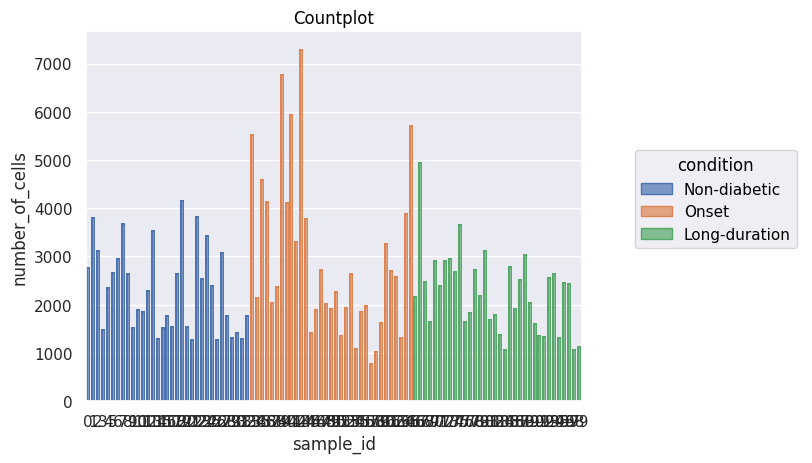

In [18]:
Analysis.plot_cell_counts()

In [19]:
Analysis.do_scaling("%quantile", 99.9)

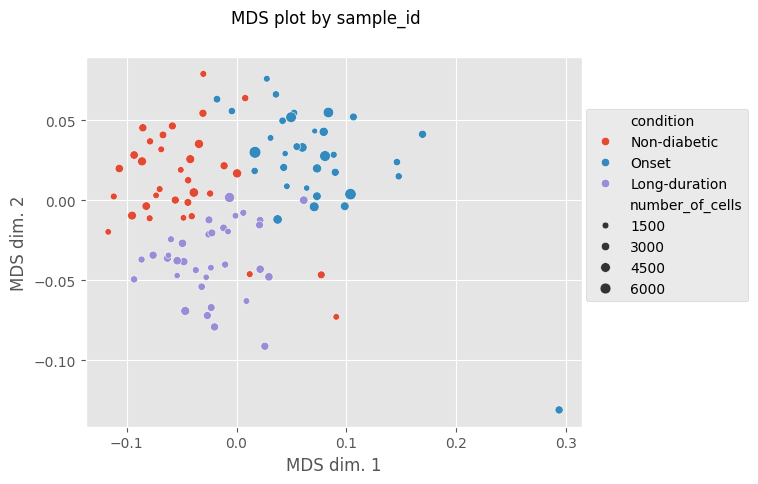

In [20]:
fig, mds_df = Analysis.plot_MDS(marker_class = 'type', color_by = 'condition')
fig

In [21]:
Analysis.do_flowsom(n_clusters = 20, rlen = 50, seed = 1234, scale_within_cells = True)
## means reload can be as simple as (and the Flowsom cell above can be skipped):
Analysis.export_clustering()
print(time.time() - start_timer)  ## keep track of time after each major step

C:\Users\benca\miniforge3\envs\main\lib\site-packages\mudata\_core\mudata.py:1531: FutureWarning: From 0.4 .update() will not pull obs/var columns from individual modalities by default anymore. Set mudata.set_options(pull_on_update=False) to adopt the new behaviour, which will become the default. Use new pull_obs/pull_var and push_obs/push_var methods for more flexibility.
  self._update_attr("var", axis=0, join_common=join_common)
C:\Users\benca\miniforge3\envs\main\lib\site-packages\mudata\_core\mudata.py:1429: FutureWarning: From 0.4 .update() will not pull obs/var columns from individual modalities by default anymore. Set mudata.set_options(pull_on_update=False) to adopt the new behaviour, which will become the default. Use new pull_obs/pull_var and push_obs/push_var methods for more flexibility.
  self._update_attr("obs", axis=1, join_common=join_common)
2025-10-23 12:26:30.500 | DEBUG    | flowsom.main:__init__:82 - Reading input.
2025-10-23 12:26:30.526 | DEBUG    | flowsom.main

1693.3387551307678


In [22]:
Analysis.load_clustering(Analysis.clusterings_dir + "/metaclustering.csv")

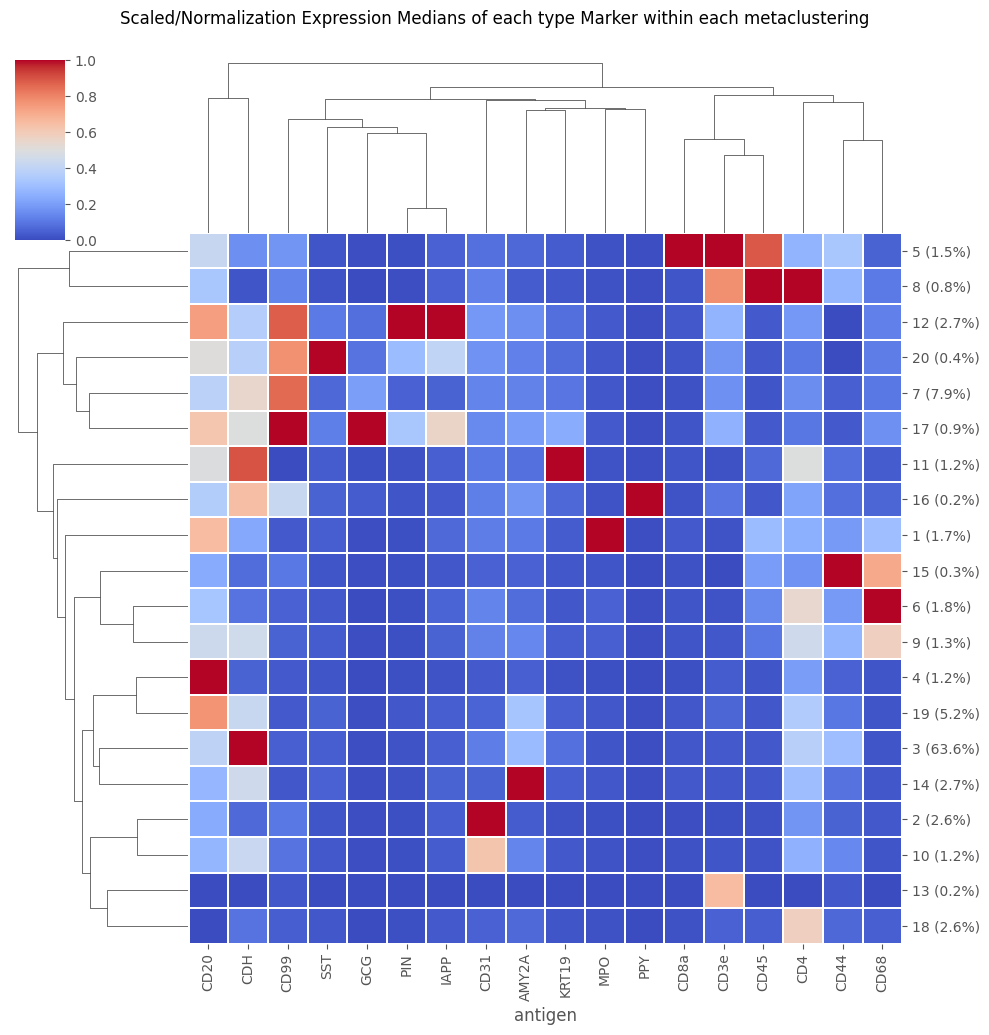

In [23]:
fig = Analysis.plot_medians_heatmap(marker_class = 'type', groupby = 'metaclustering')
fig

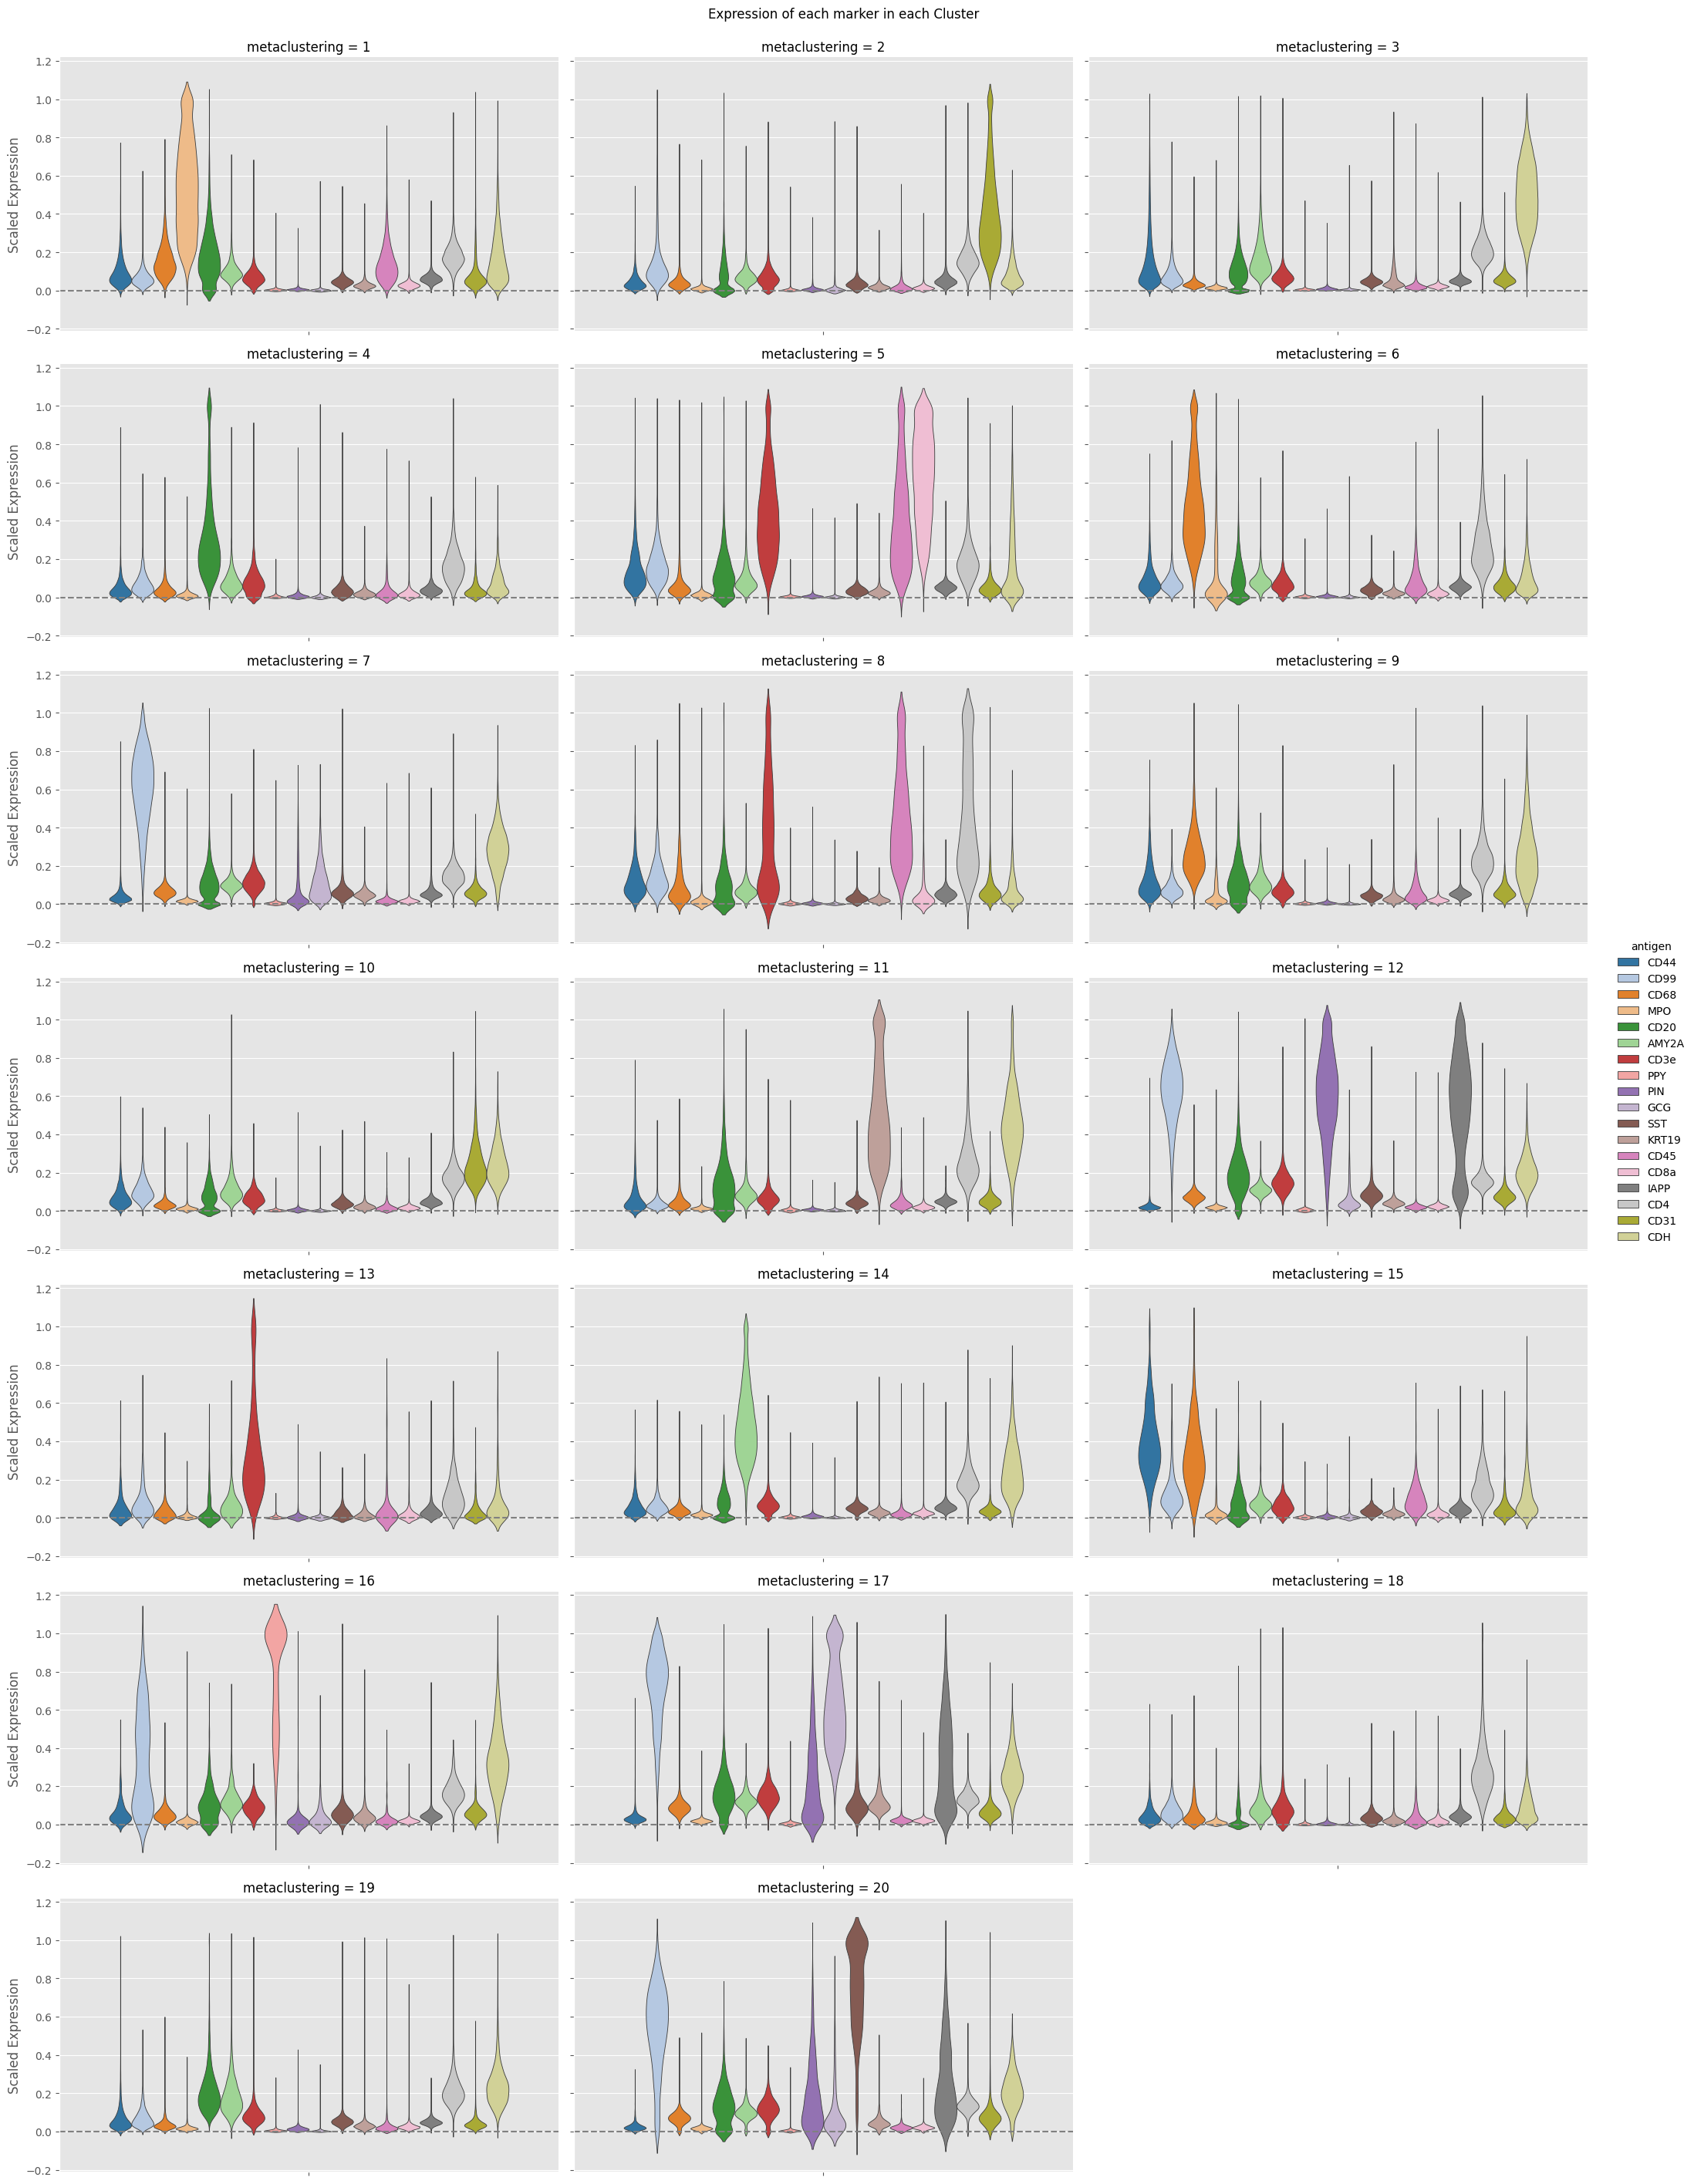

In [24]:
Analysis.plot_cluster_distributions(groupby_column = 'metaclustering', plot_type = 'violin')

In [25]:
Analysis.do_UMAP(marker_class = 'type', cell_number = 1000, seed = 42)
print(time.time() - start_timer) 

C:\Users\benca\miniforge3\envs\main\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


2464.1349716186523


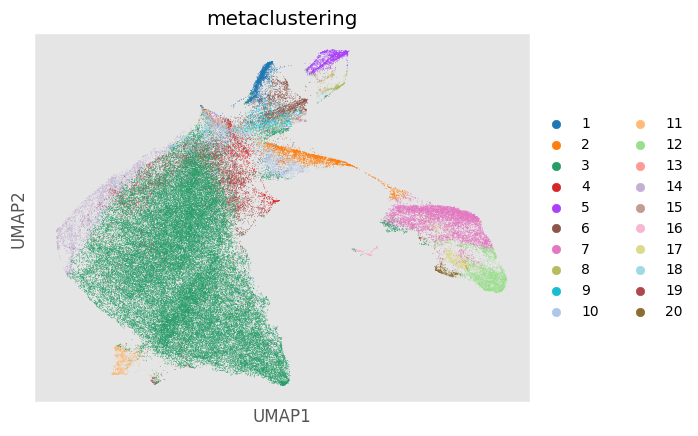

In [26]:
Analysis.plot_UMAP(color_by = 'metaclustering')

## Annotation

Paper's annotation categories: alpha, beta, gamma, delta cells (islets), Tc, Naive Tc, Th, B, Mono, 
Neutrophils, Other immune (immune), Acinar, Ductal, Endothelial, Stromal, Unknown

my protein assignments:

    (islet) -- CD99 positive, CHD negative -- (multiple clusters)
    alpha -- GCG -- cluster #17, 7
    beta -- PIN, IAPP -- cluster #12
    gamma -- PPY  -- cluster #16
    delta -- SST -- cluster #20

    (immune) -- CD45+ -- (multiple clusters, not very clean for CD45)
    Tc -- CD3+, CD8+, CD45RA negative -- cluster #5
    Naive Tc -- CD3, CD8, CD45RA -- cluster # N/A      >>> CD45RA removed as an unreliable / unhelpful marker. Perhaps try adding back
    Th -- CD3, CD4 -- cluster #8, 13
    B -- CD20 -- cluster #4
    Mono -- CD68 -- cluster #6,9,15
    neutrophil -- MPO -- cluster #1
    Other immune -- CD45, nothing else -- No clusters

    (exocrine) --  -- (multiple clusters)
    Acinar -- AMY2A -- cluster #14, 19
    Ductal -- KRT19 -- cluster #11

    Stroma -- CDH, neg for all else -- cluster #3     (63% ! -- would prefer this split up [?])

    Endothelial -- CD31 -- cluster #2, 10

    Unknown -- all neg, impossible clusters -- cluster #18  (maybe 7)

In [27]:
numbers = [str(i) for i in range(1,21,1)]
cell_assignments = ["neutrophil","Endothelial","Stroma","B","Tc",    ### ordered list of assignments from cluster 1-->20
                       "Mono","alpha","Th","Mono","Endothelial",
                      "Ductal","beta","Th","Acinar","Mono",
                      "gamma","alpha","Unknown","Acinar","delta"]
replacement_dict = dict(zip(numbers,cell_assignments))
Analysis.data.obs['cell_merging'] = Analysis.data.obs['metaclustering'].astype('str').replace(replacement_dict).astype('category') 

In [28]:
_ = Analysis.export_clustering('cell_merging')

In [29]:
Analysis.load_clustering(Analysis.clusterings_dir + "/cell_merging.csv")

In [30]:
Analysis.UMAP_embedding.obs['cell_merging'] = Analysis.UMAP_embedding.obs['metaclustering'].astype('str').replace(replacement_dict).astype('category') 

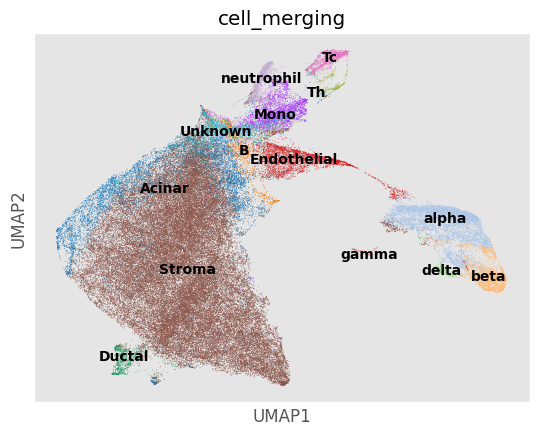

In [31]:
Analysis.plot_UMAP(color_by = 'cell_merging', legend_loc = 'on data')

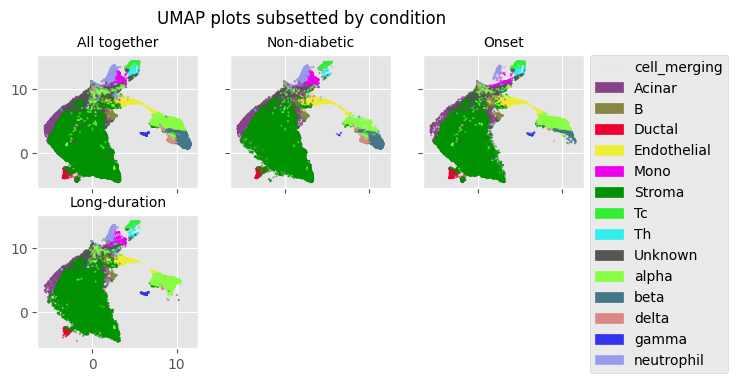

In [32]:
Analysis.plot_facetted_DR(color_by = 'cell_merging', kind = 'UMAP', subsetting_column = 'condition')

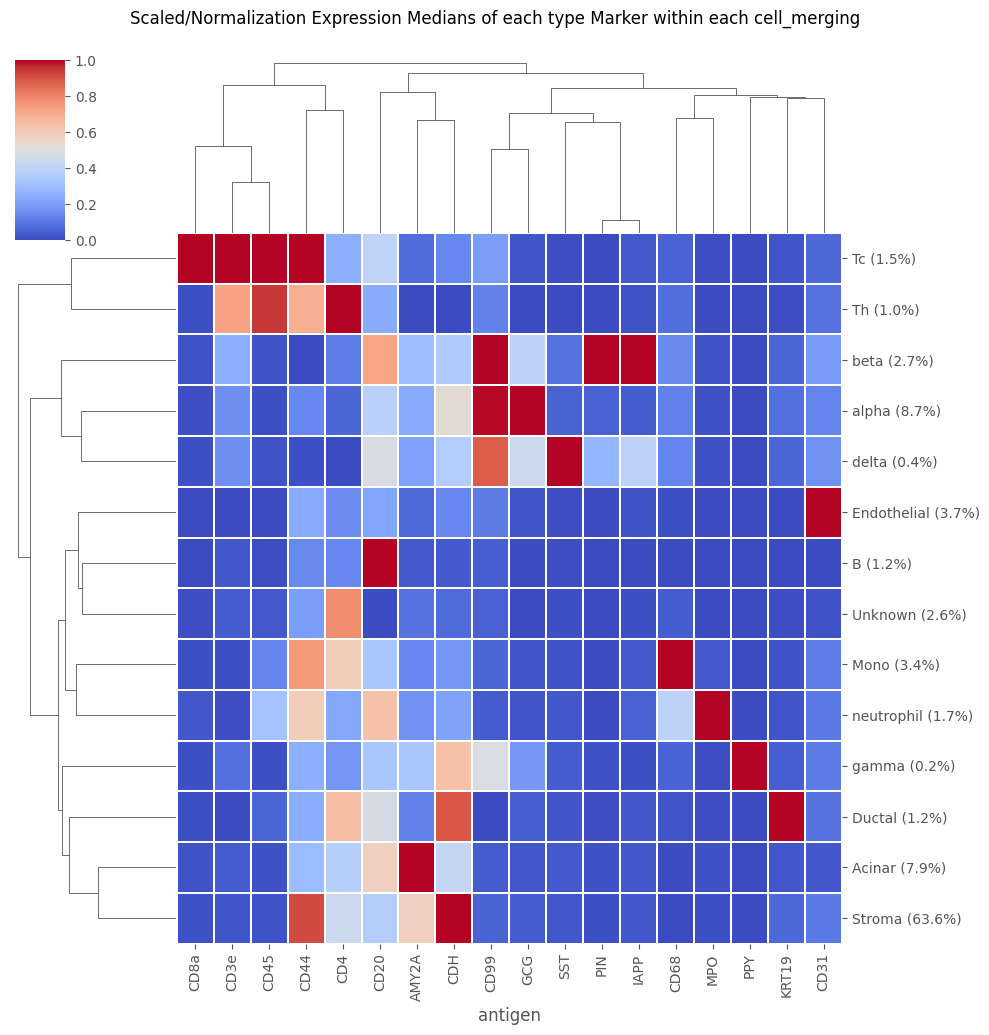

In [33]:
fig = Analysis.plot_medians_heatmap(marker_class = 'type', groupby = 'cell_merging')
fig

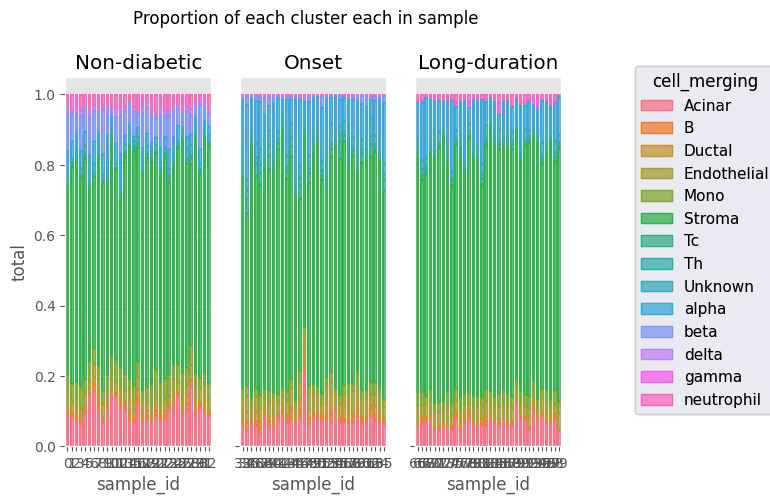

In [34]:
Analysis.plot_cluster_abundance_1(groupby_column = "cell_merging")

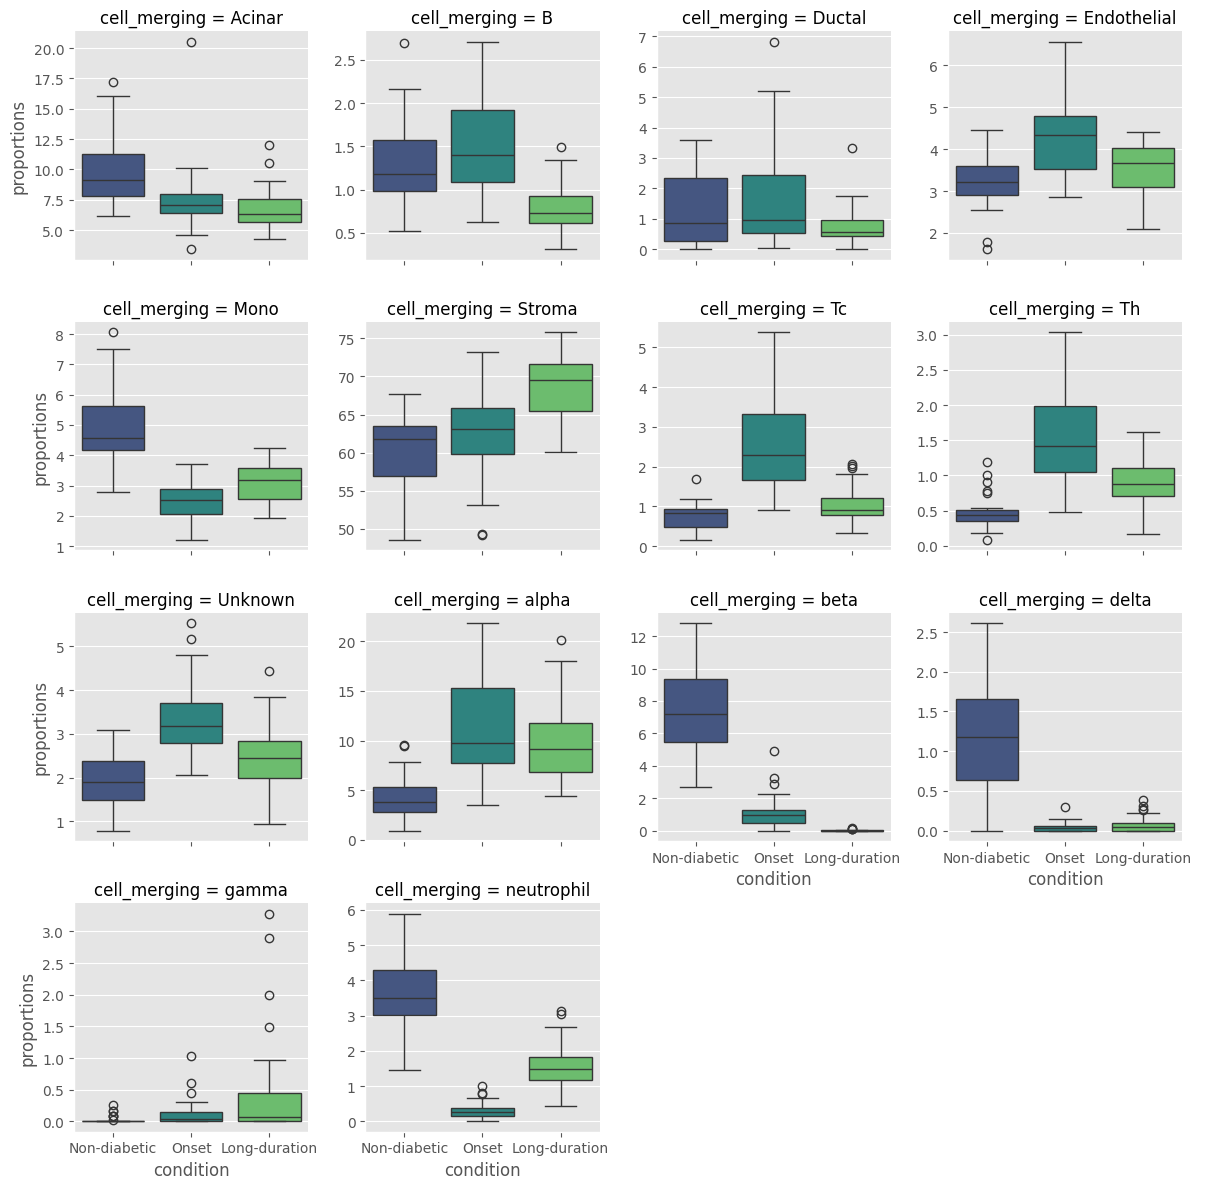

In [35]:
Analysis.plot_cluster_abundance_2(groupby_column = "cell_merging", 
                                  hue = 'condition', 
                                  plot_type = 'boxplot', 
                                 N_column = 'sample_id')

In [36]:
Analysis.do_state_exprs_ANOVAs(marker_class = 'type', groupby_column = 'cell_merging', N_column = 'sample_id')

,antigen,cell_merging,p_value,p_adj,F statistic,avg Non-diabetic mean exprs,Non-diabetic avg stdev,avg Onset mean exprs,Onset avg stdev,avg Long-duration mean exprs,Long-duration avg stdev
220,PIN,beta,8.124000e-53,1.346000e-24,526.6000,0.611700,0.051720,0.525000,0.135800,0.001121,0.003023
177,IAPP,alpha,8.527000e-45,1.346000e-24,344.5000,0.271800,0.064590,0.073270,0.015300,0.046760,0.004122
221,PIN,delta,5.428000e-43,1.346000e-24,312.2000,0.222100,0.065110,0.010200,0.025080,0.006034,0.007055
178,IAPP,beta,2.052000e-41,1.346000e-24,286.2000,0.609600,0.069350,0.126300,0.041030,0.064220,0.155300
248,SST,beta,5.371000e-39,1.346000e-24,249.9000,0.120300,0.021640,0.076930,0.018510,0.008084,0.021870
...,...,...,...,...,...,...,...,...,...,...,...
161,GCG,Th,6.951000e-01,7.063000e-01,0.3650,0.006078,0.012070,0.005072,0.004046,0.004488,0.004106
57,CD4,B,7.101000e-01,7.187000e-01,0.3436,0.180500,0.031230,0.179000,0.032540,0.185300,0.033520
167,GCG,neutrophil,7.160000e-01,7.217000e-01,0.3353,0.004600,0.002982,0.004464,0.005565,0.005221,0.003062
166,GCG,gamma,7.767000e-01,7.798000e-01,0.2533,0.028150,0.084330,0.018960,0.032850,0.026720,0.037900


In [37]:
space_analysis = palmettobug.SpatialAnalysis()
space_analysis.add_Analysis(Analysis)

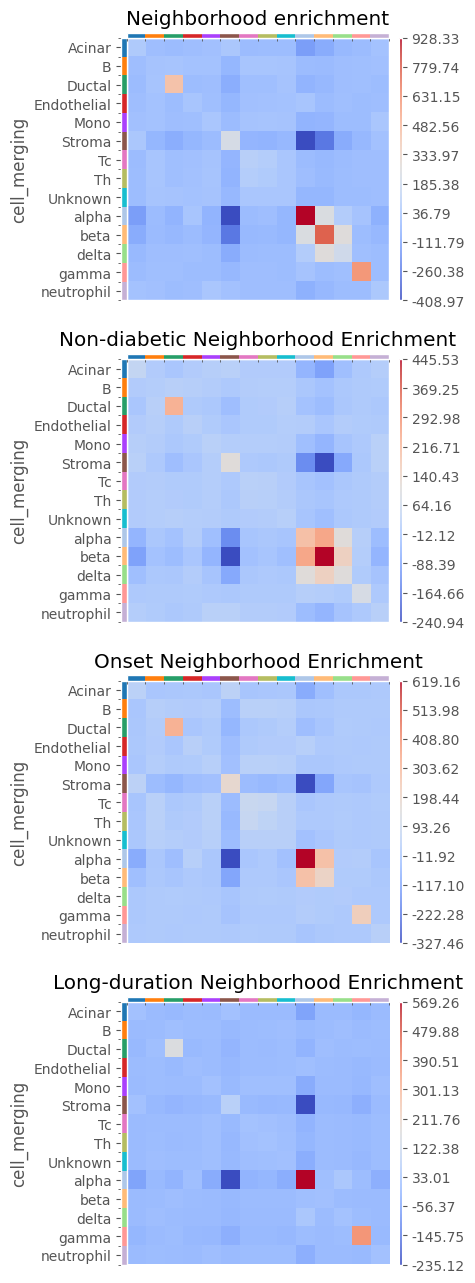

In [38]:
space_analysis.do_neighbors('Radius', 25)
space_analysis.plot_neighbor_enrichment(clustering = 'cell_merging', facet_by = 'condition')

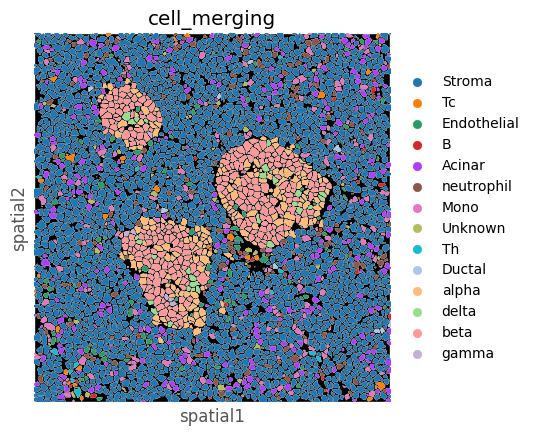

In [39]:
space_analysis.plot_cell_maps('masks', id = '1', clustering = 'cell_merging')

In [40]:
cell_assignments = ["neutrophil","Endothelial","Stroma","B","Tc",    ### unique cell type categories
                    "Mono","alpha","Th", "Ductal","beta","Acinar",
                    "gamma","Unknown","delta"]

for i in cell_assignments:
    if i not in ["Th","Tc","beta"]: 
        Analysis.filter_data(i, 'cell_merging')
### SpaceANOVA is currently very computationally expensive, and it pays to pair down the bulk of 
    # uninteresting cells as well as any uninteresting comparisons before running
    ## here I only care about Tc / Th <--> Beta cell interactions
    ## although note that the dropped cells are still used in any permutation correction calculations of the ripley's stats

space_analysis.do_SpaceANOVA_ripleys_stats(condition1 = None, condition2 = None, clustering = 'cell_merging', 
                                          max = 80, min = 16, step = 4, threshold = 5, permutations = 5, seed = 42, 
                                           center_on_zero = False, suppress_threshold_warnings = True)

C:\Users\benca\miniforge3\envs\main\lib\site-packages\anndata\_core\aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


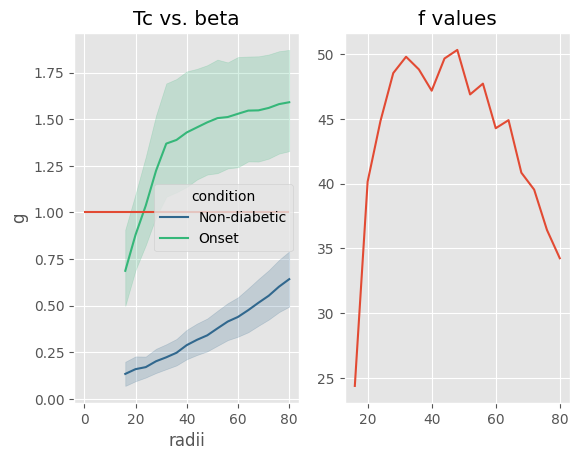

In [41]:
plot = space_analysis.plot_spaceANOVA_function(stat = 'g', comparison = 'Tc___beta', seed = 42, f_stat = 'f', hline = 1)

In [42]:
padj, p, stat = space_analysis.run_SpaceANOVA_statistics('g', 42)
padj

,Tc,Th,beta
Tc,5.544000e-01,8.970000e-01,2.250000e-25
Th,8.970000e-01,8.970000e-01,2.250000e-25
beta,2.250000e-25,2.250000e-25,8.970000e-01


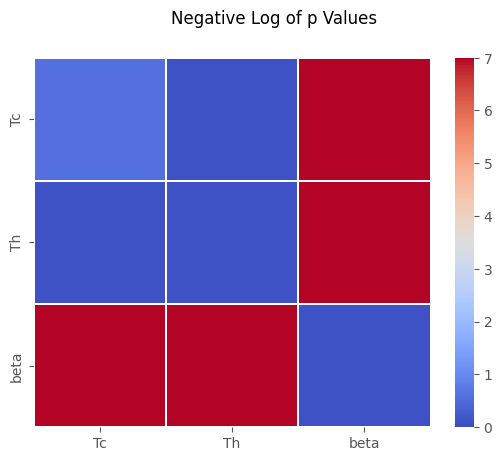

In [43]:
space_analysis.plot_spaceANOVA_heatmap('padj')

In [44]:
## Reinitialize the Analysis (restore dropped cells)
Analysis = palmettobug.Analysis()
Analysis.load_data(directory + "/Analyses/analysis_subset/main", arcsinh_cofactor = 5) 
Analysis.do_scaling("%quantile", 99.9)
Analysis.load_clustering(Analysis.clusterings_dir + "/cell_merging.csv")

In [45]:
## Do EDT for immune cell types
space_analysis = palmettobug.SpatialAnalysis()
space_analysis.add_Analysis(Analysis)
        
classifier_folder = px_classifier.classifier_dir
masks_folder = Analysis.input_mask_folder
df = space_analysis.do_edt(pixel_classifier_folder = classifier_folder, masks_folder = masks_folder, smoothing = 100, stat = 'mean', normalized = False, background = False)

C:\Users\benca\miniforge3\envs\main\lib\site-packages\seaborn\categorical.py:700: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
  artists = ax.bxp(**boxplot_kws)
C:\Users\benca\miniforge3\envs\main\lib\site-packages\seaborn\categorical.py:700: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
  artists = ax.bxp(**boxplot_kws)
C:\Users\benca\miniforge3\envs\main\lib\site-packages\seaborn\categorical.py:700: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
  artists = ax.bxp(**boxplot_kws)


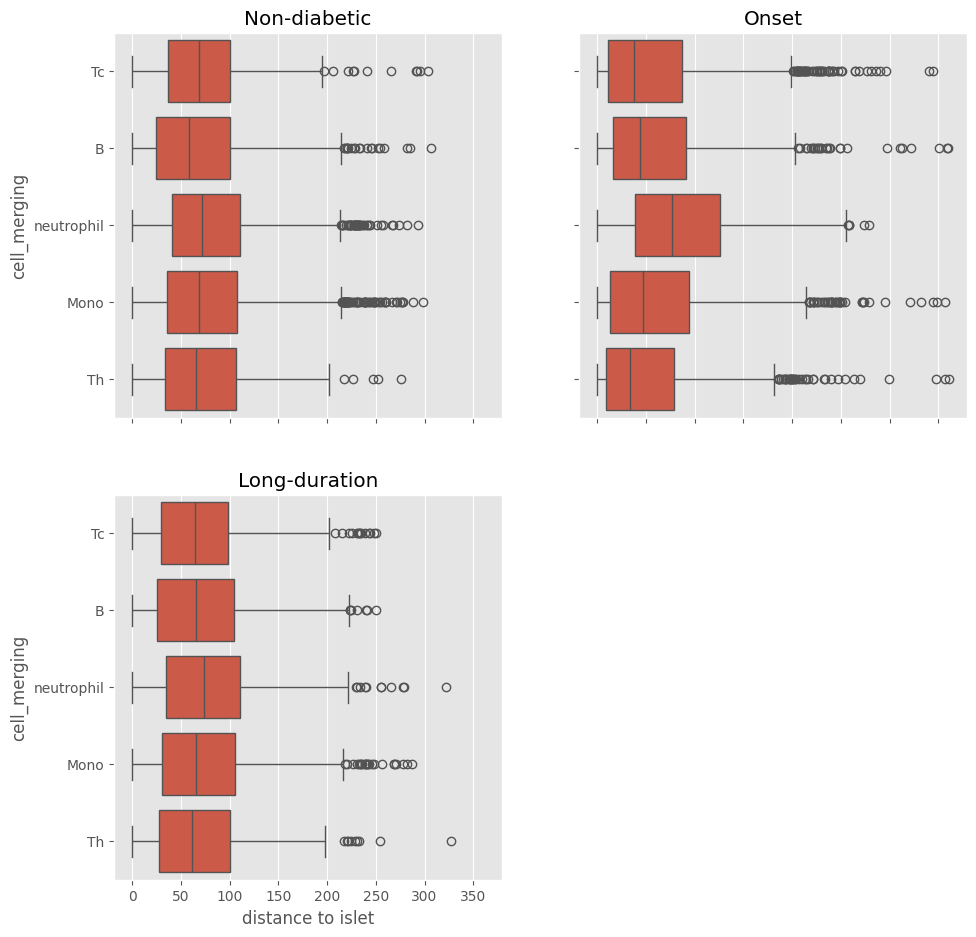

In [46]:
## We only care about immune cell subsets -- but be SURE TO DO THIS AFTER THE EDT! Otherwise, the edt calculation will have a mismatch with the data
    ## and fail to run
cell_assignments = ["neutrophil","Endothelial","Stroma","B","Tc",    ### unique cell type categories
                    "Mono","alpha","Th", "Ductal","beta","Acinar",
                    "gamma","Unknown","delta"]

for i in cell_assignments:
    if i not in ["neutrophil","B","Tc","Mono","Th"]: 
        Analysis.filter_data(i, 'cell_merging')

## scaling also affects EDTs (!!)
Analysis.do_scaling("unscale")
space_analysis.plot_edt_boxplot("distance to islet", groupby_col = "cell_merging")

In [47]:
## do a basic ANOVA test -- we see here that Onset immune cells (except neutrophils) are all closer to the islets than the other two conditions
## Further, T helper cells (Th) are also closer to the islets in the long-duration group. 

## Note that an ANOVA may or may not be the best the test for this (it is likely not!) but it is a simple, straightforwrd, and common test.
    ## PalmettoBUG is mainly designed for a first look at the data, and more thorough / rigorously tested statistical testing should typically
    ## done in a different tool -- this should be fairly straightforward to do by exporting the PalmettoBUG into a CSV.

space_analysis.run_edt_statistics("cell_merging", N_column = 'sample_id')

,antigen,cell_merging,p_value,p_adj,F statistic,avg Non-diabetic mean exprs,Non-diabetic avg stdev,avg Onset mean exprs,Onset avg stdev,avg Long-duration mean exprs,Long-duration avg stdev
3,distance to islet,Th,0.000227,0.001135,9.1600,72.71,21.93,51.90,20.02,70.35,22.90
1,distance to islet,Mono,0.002493,0.006233,6.3800,74.94,14.47,61.35,15.59,73.60,20.41
0,distance to islet,B,0.016470,0.027450,4.2850,69.98,16.38,59.77,17.80,73.25,23.70
2,distance to islet,Tc,0.022840,0.028550,3.9300,74.36,23.18,59.57,19.51,69.91,23.10
4,distance to islet,neutrophil,0.417500,0.417500,0.8814,77.58,14.53,86.25,40.44,79.02,24.39


In [48]:
##restore dropped cell types, using a faster but less reliable method (yet sufficient for here) compared to fully reinitializing the Analysis
Analysis.data = Analysis.back_up_data.copy()   ### this line will restore the Analysis' data to its state before the FIRST filter_data call -- except the unscaled backup data
                                                ## back_up_data is only made (automatically) by the first filter_data() call -- when back_up_data == None
                                                ## Note that this does not restore regionprops_data or the UMAP embedding, etc.
Analysis.regionprops_data = Analysis.back_up_regions.copy() ## needed to allow certain palmettobug methods to work

Analysis.unscaled_data = Analysis.data  ## doesn't fix the unscaled data, but allows certain palmettobug methods to work

In [49]:
Analysis.do_UMAP(marker_class = 'type', cell_number = 1000, seed = 42)  # re-do UMAP
print(time.time() - start_timer) 

4397.719410896301


In [50]:
## The labels of the unique regions are as follows:
    ## cells outside any region -- '0_0'
    ## cell inside a region follow the convention '{region#_within_ROI}_{ROI#}'

Analysis.do_regions(ImageAnalysis.directory_object.masks_dir + "/islet_masks")
Analysis.data.obs['regions'].unique()

array(['0_0', '1_0', '2_0', '1_1', '2_1', '3_1', '1_2', '2_2', '3_2',
       '1_3', '1_4', '2_4', '1_5', '2_5', '1_6', '2_6', '1_7', '2_7',
       '3_7', '1_8', '2_8', '1_9', '1_10', '2_10', '1_11', '1_12', '1_13',
       '2_13', '3_13', '1_14', '1_15', '1_16', '2_16', '1_17', '1_18',
       '2_18', '3_18', '1_19', '2_19', '3_19', '4_19', '1_20', '2_20',
       '1_21', '1_22', '2_22', '3_22', '1_23', '2_23', '1_24', '2_24',
       '1_25', '2_25', '1_26', '2_26', '3_27', '1_27', '2_27', '1_28',
       '2_28', '1_29', '1_30', '1_31', '2_31', '1_32', '2_32', '1_33',
       '2_33', '3_33', '1_34', '1_35', '2_35', '3_35', '5_35', '4_35',
       '1_36', '2_36', '3_36', '5_36', '4_36', '1_37', '2_37', '2_38',
       '1_38', '3_38', '1_39', '2_39', '3_39', '4_39', '5_39', '6_39',
       '7_39', '8_39', '2_40', '1_40', '3_40', '4_40', '1_41', '2_41',
       '3_41', '4_41', '1_42', '2_42', '3_42', '1_43', '2_43', '3_43',
       '4_43', '5_43', '1_44', '2_44', '3_44', '1_45', '1_46', '1_47',
    

In [51]:
Analysis.filter_data('0_0','regions')

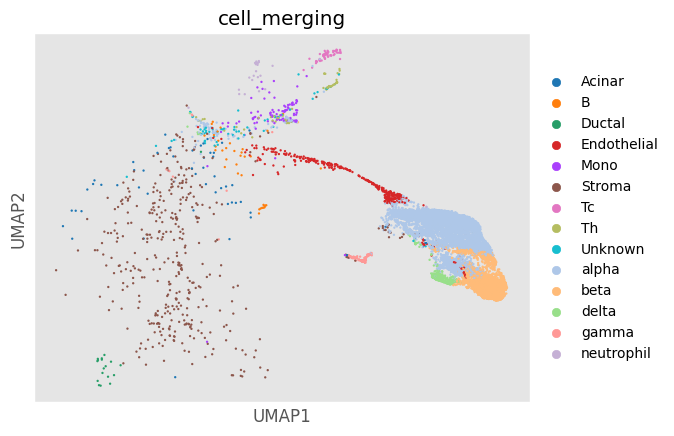

In [52]:
Analysis.plot_UMAP(color_by = 'cell_merging')

In [53]:
regions_df = pd.DataFrame(Analysis.data.X, index = Analysis.data.obs.index, columns = list(Analysis.data.var.index))
transfer_columns = ['sample_id','regions','cell_merging','condition']
regions_df[transfer_columns] = Analysis.data.obs[transfer_columns]

rep_channels = ['PIN','IAPP','PDX1','SYP','INS','PTPRN','NKX6-1','CD99']
rep_df = regions_df[['sample_id','regions','cell_merging','condition','PIN','IAPP','PDX1','SYP','INS','PTPRN','NKX6-1','CD99']]
rep_df = rep_df.melt(transfer_columns)

C:\Users\benca\miniforge3\envs\main\lib\site-packages\seaborn\categorical.py:700: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
  artists = ax.bxp(**boxplot_kws)
C:\Users\benca\miniforge3\envs\main\lib\site-packages\seaborn\categorical.py:700: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
  artists = ax.bxp(**boxplot_kws)
C:\Users\benca\miniforge3\envs\main\lib\site-packages\seaborn\categorical.py:700: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
  artists = ax.bxp(**boxplot_kws)
C:\Users\benca\miniforge3\envs\main\lib\site-packages\seaborn\categorical.py:700: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
  artists = ax.bxp(**boxplot_kws)
C:\Users\ben

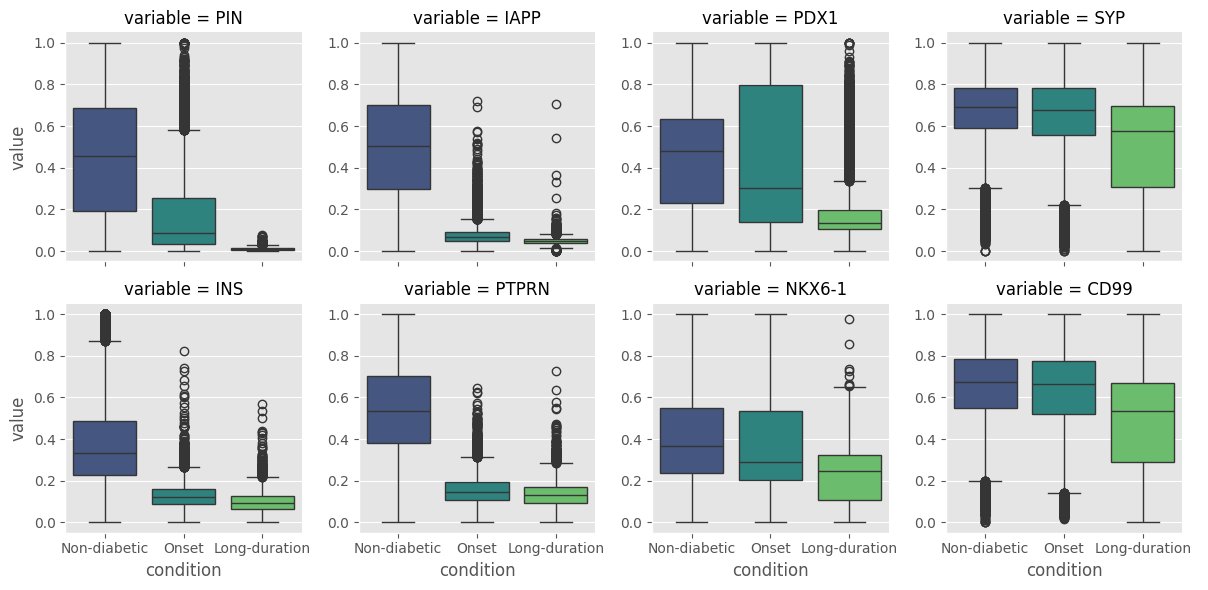

In [54]:
Grid = sns.FacetGrid(rep_df, col = 'variable', col_wrap = 4, sharey = False)
Grid.map_dataframe(sns.boxplot, x = 'condition', y = 'value', hue = 'condition', palette = 'viridis')
Grid.add_legend()
plt.show()

C:\Users\benca\miniforge3\envs\main\lib\site-packages\seaborn\categorical.py:700: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
  artists = ax.bxp(**boxplot_kws)
C:\Users\benca\miniforge3\envs\main\lib\site-packages\seaborn\categorical.py:700: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
  artists = ax.bxp(**boxplot_kws)
C:\Users\benca\miniforge3\envs\main\lib\site-packages\seaborn\categorical.py:700: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
  artists = ax.bxp(**boxplot_kws)


<Axes: xlabel='condition', ylabel='percent'>

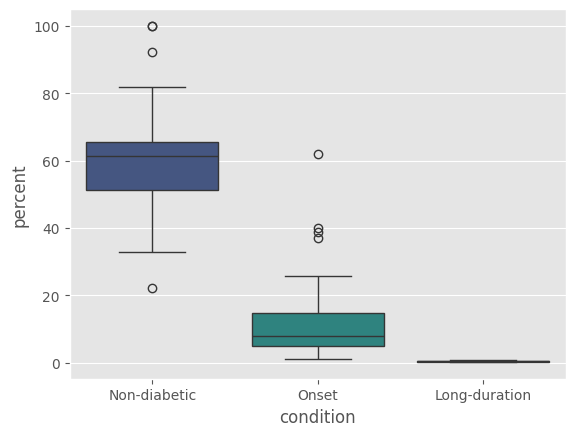

In [55]:
islet_cells = regions_df.groupby(['regions','condition','cell_merging'], observed = True).count().reset_index()[['regions','condition','cell_merging','H3']]
islet_totals = regions_df.groupby(['regions'], observed = True).count().reset_index()[['regions','pH3']]
islet_cells = pd.merge(islet_cells, islet_totals, on = 'regions')
islet_cells['percent'] = (islet_cells['H3'] / islet_cells['pH3'])*100

sns.boxplot(islet_cells[islet_cells['cell_merging'] == 'beta'], x = 'condition', y = 'percent', hue = 'condition', palette = 'viridis')

In [56]:
print(time.time() - start_timer) 

4644.188002824783


In [57]:
import anndata
by_region = regions_df.groupby('regions').mean(numeric_only = True).reset_index()
by_region_ann = anndata.AnnData(X = np.array(by_region.drop('regions', axis = 1)), obs = pd.DataFrame(by_region['regions']), var = pd.DataFrame(Analysis.data.var))
by_region_ann = by_region_ann[:,by_region_ann.var['marker_class'] == 'type']

In [58]:
zip_dict = {}
for i in regions_df['regions'].unique():
    zip_dict[i] = regions_df[regions_df['regions'] == i]['condition'].values[0]
by_region_ann.obs['condition'] = by_region_ann.obs['regions'].replace(zip_dict).astype(Analysis.data.obs['condition'].dtype)

C:\Users\benca\AppData\Local\Temp\ipykernel_21180\1175791699.py:4: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  by_region_ann.obs['condition'] = by_region_ann.obs['regions'].replace(zip_dict).astype(Analysis.data.obs['condition'].dtype)


In [59]:
by_region_ann.obs

,regions,condition
0,1_0,Non-diabetic
1,1_1,Non-diabetic
2,1_10,Non-diabetic
3,1_11,Non-diabetic
4,1_12,Non-diabetic
...,...,...
208,5_43,Onset
209,5_65,Onset
210,6_39,Onset
211,7_39,Onset


In [60]:
sc.pp.neighbors(by_region_ann)

C:\Users\benca\miniforge3\envs\main\lib\site-packages\umap\umap_.py:1401: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


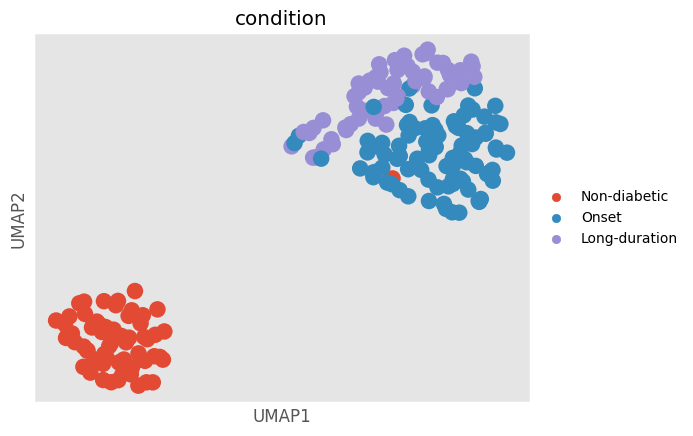

In [61]:
sc.tl.umap(by_region_ann, min_dist = 2.5)
sc.pl.umap(by_region_ann, color = 'condition')

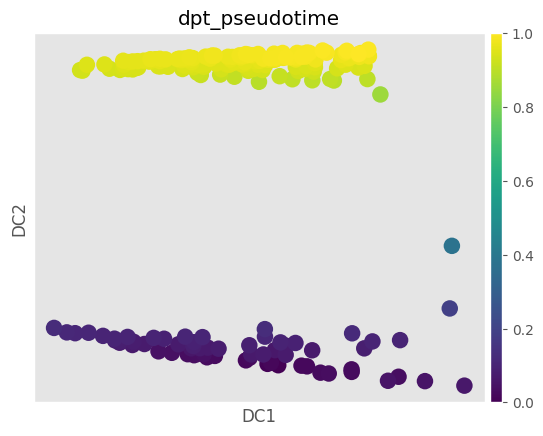

In [62]:
sc.tl.diffmap(by_region_ann)
by_region_ann.uns['iroot'] = 0
sc.tl.dpt(by_region_ann, n_dcs = 10)
sc.pl.diffmap(by_region_ann, color = 'dpt_pseudotime')

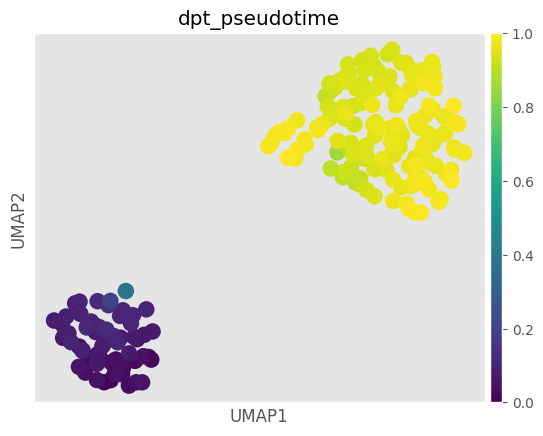

In [63]:
sc.pl.umap(by_region_ann, color = 'dpt_pseudotime')

<Axes: xlabel='condition', ylabel='dpt_pseudotime'>

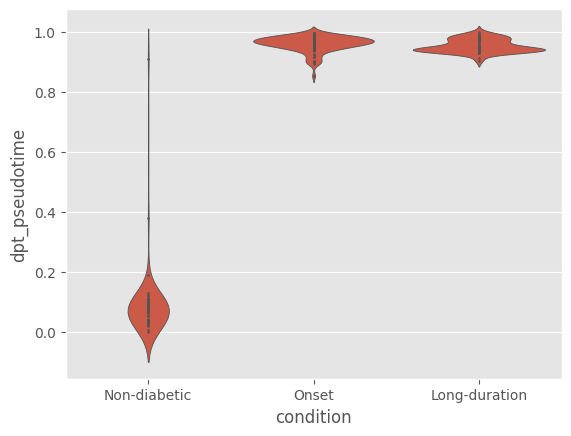

In [64]:
sns.violinplot(x = by_region_ann.obs['condition'], y = by_region_ann.obs['dpt_pseudotime'], inner = 'point')

<Axes: xlabel='condition', ylabel='dpt_pseudotime'>

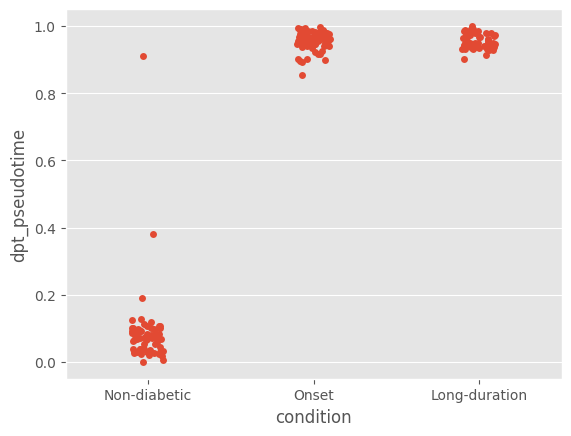

In [65]:
sns.stripplot(x = by_region_ann.obs['condition'], y = by_region_ann.obs['dpt_pseudotime'])

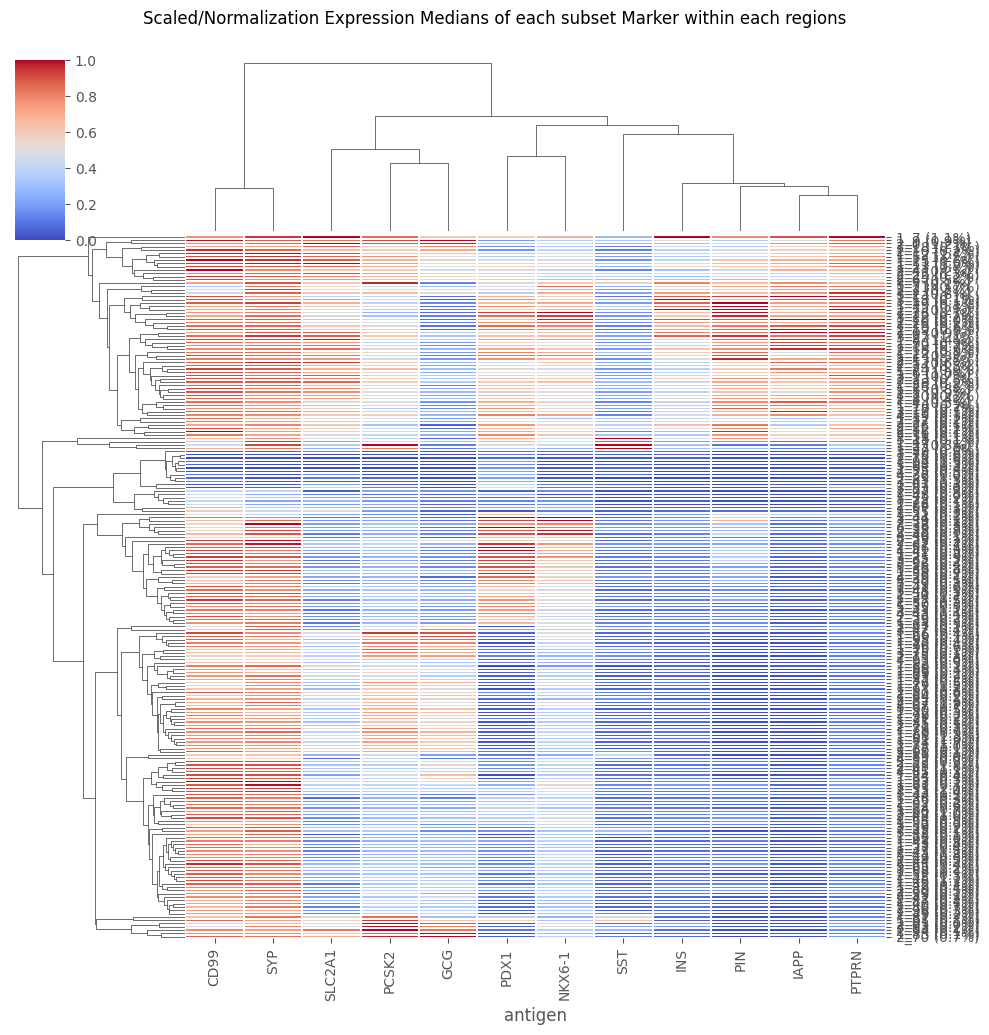

In [66]:
Analysis.data.var.index = Analysis.data.var['antigen']

rep_channels = ['PIN','IAPP','PDX1','SYP','INS','PTPRN','NKX6-1','CD99','PCSK2','GCG','SLC2A1','SST']
Analysis.data.var.loc[rep_channels,'marker_class'] = 'subset'
fig = Analysis.plot_medians_heatmap(marker_class = 'subset', groupby = 'regions')
Analysis.data.var.loc[rep_channels,'marker_class'] = 'type'
fig

In [67]:
#If keeping the following plots (islet eccentricity / area), must create new Analysis objects for islets only
analysis_folder = 'islet_analysis'
ImageAnalysis.directory_object.make_analysis_dirs(analysis_folder)
input_images = ImageAnalysis.directory_object.img_dir + "/ImageSubset"
input_masks = ImageAnalysis.directory_object.masks_dir + "/Masks_large_islets"

ImageAnalysis.make_segmentation_measurements(input_images, input_masks, re_do = False)
_, __, ___, ____ = ImageAnalysis.to_analysis()   ## needed to make FCS files from segmentation measurements, but we don't need new metadata / panel files
panel.to_csv(panel_path.replace("analysis_subset", analysis_folder))
metadata.to_csv(metadata_path.replace("analysis_subset", analysis_folder))
IsletAnalysis = palmettobug.Analysis()
IsletAnalysis.load_data(directory + f"/Analyses/{analysis_folder}/main")

IsletAnalysis.regionprops_data.index = pd.Series([i for i in range(len(IsletAnalysis.regionprops_data))])
IsletAnalysis.data.obs.index = pd.Series([i for i in range(len(IsletAnalysis.regionprops_data))])
IsletAnalysis.regionprops_data = pd.merge(IsletAnalysis.regionprops_data, IsletAnalysis.data.obs, left_index = True, right_index = True, suffixes = ["","_y"])

All images have intensity and region files written! Did you intend to redo these measurements?
Analysis panel file generated from scratch
Metadata file generated from scratch


C:\Users\benca\miniforge3\envs\main\lib\site-packages\seaborn\categorical.py:700: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
  artists = ax.bxp(**boxplot_kws)
C:\Users\benca\miniforge3\envs\main\lib\site-packages\seaborn\categorical.py:700: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
  artists = ax.bxp(**boxplot_kws)
C:\Users\benca\miniforge3\envs\main\lib\site-packages\seaborn\categorical.py:700: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
  artists = ax.bxp(**boxplot_kws)


<Axes: xlabel='condition', ylabel='eccentricity'>

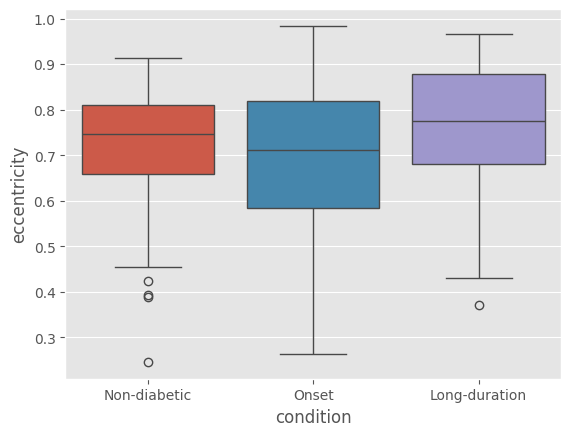

In [68]:
sns.boxplot(IsletAnalysis.regionprops_data, y = 'eccentricity', x = 'condition', hue = 'condition')

C:\Users\benca\miniforge3\envs\main\lib\site-packages\seaborn\categorical.py:700: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
  artists = ax.bxp(**boxplot_kws)
C:\Users\benca\miniforge3\envs\main\lib\site-packages\seaborn\categorical.py:700: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
  artists = ax.bxp(**boxplot_kws)
C:\Users\benca\miniforge3\envs\main\lib\site-packages\seaborn\categorical.py:700: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
  artists = ax.bxp(**boxplot_kws)


<Axes: xlabel='condition', ylabel='area'>

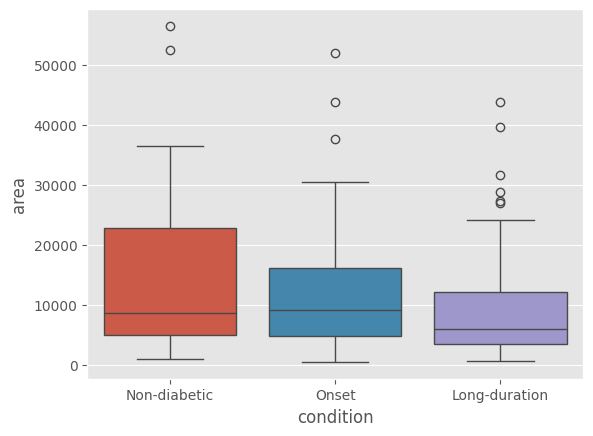

In [69]:
sns.boxplot(IsletAnalysis.regionprops_data, y = 'area', x = 'condition', hue = 'condition')

In [70]:
print(time.time() - start_timer) 

4681.980328798294
